# Housing Market Prediction

## This project is using data from Kaggle to try and predict housing prices


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import pickle

%matplotlib inline

In [2]:
# Load housing data from csv file
data = pd.read_csv('./static/data/data.csv')

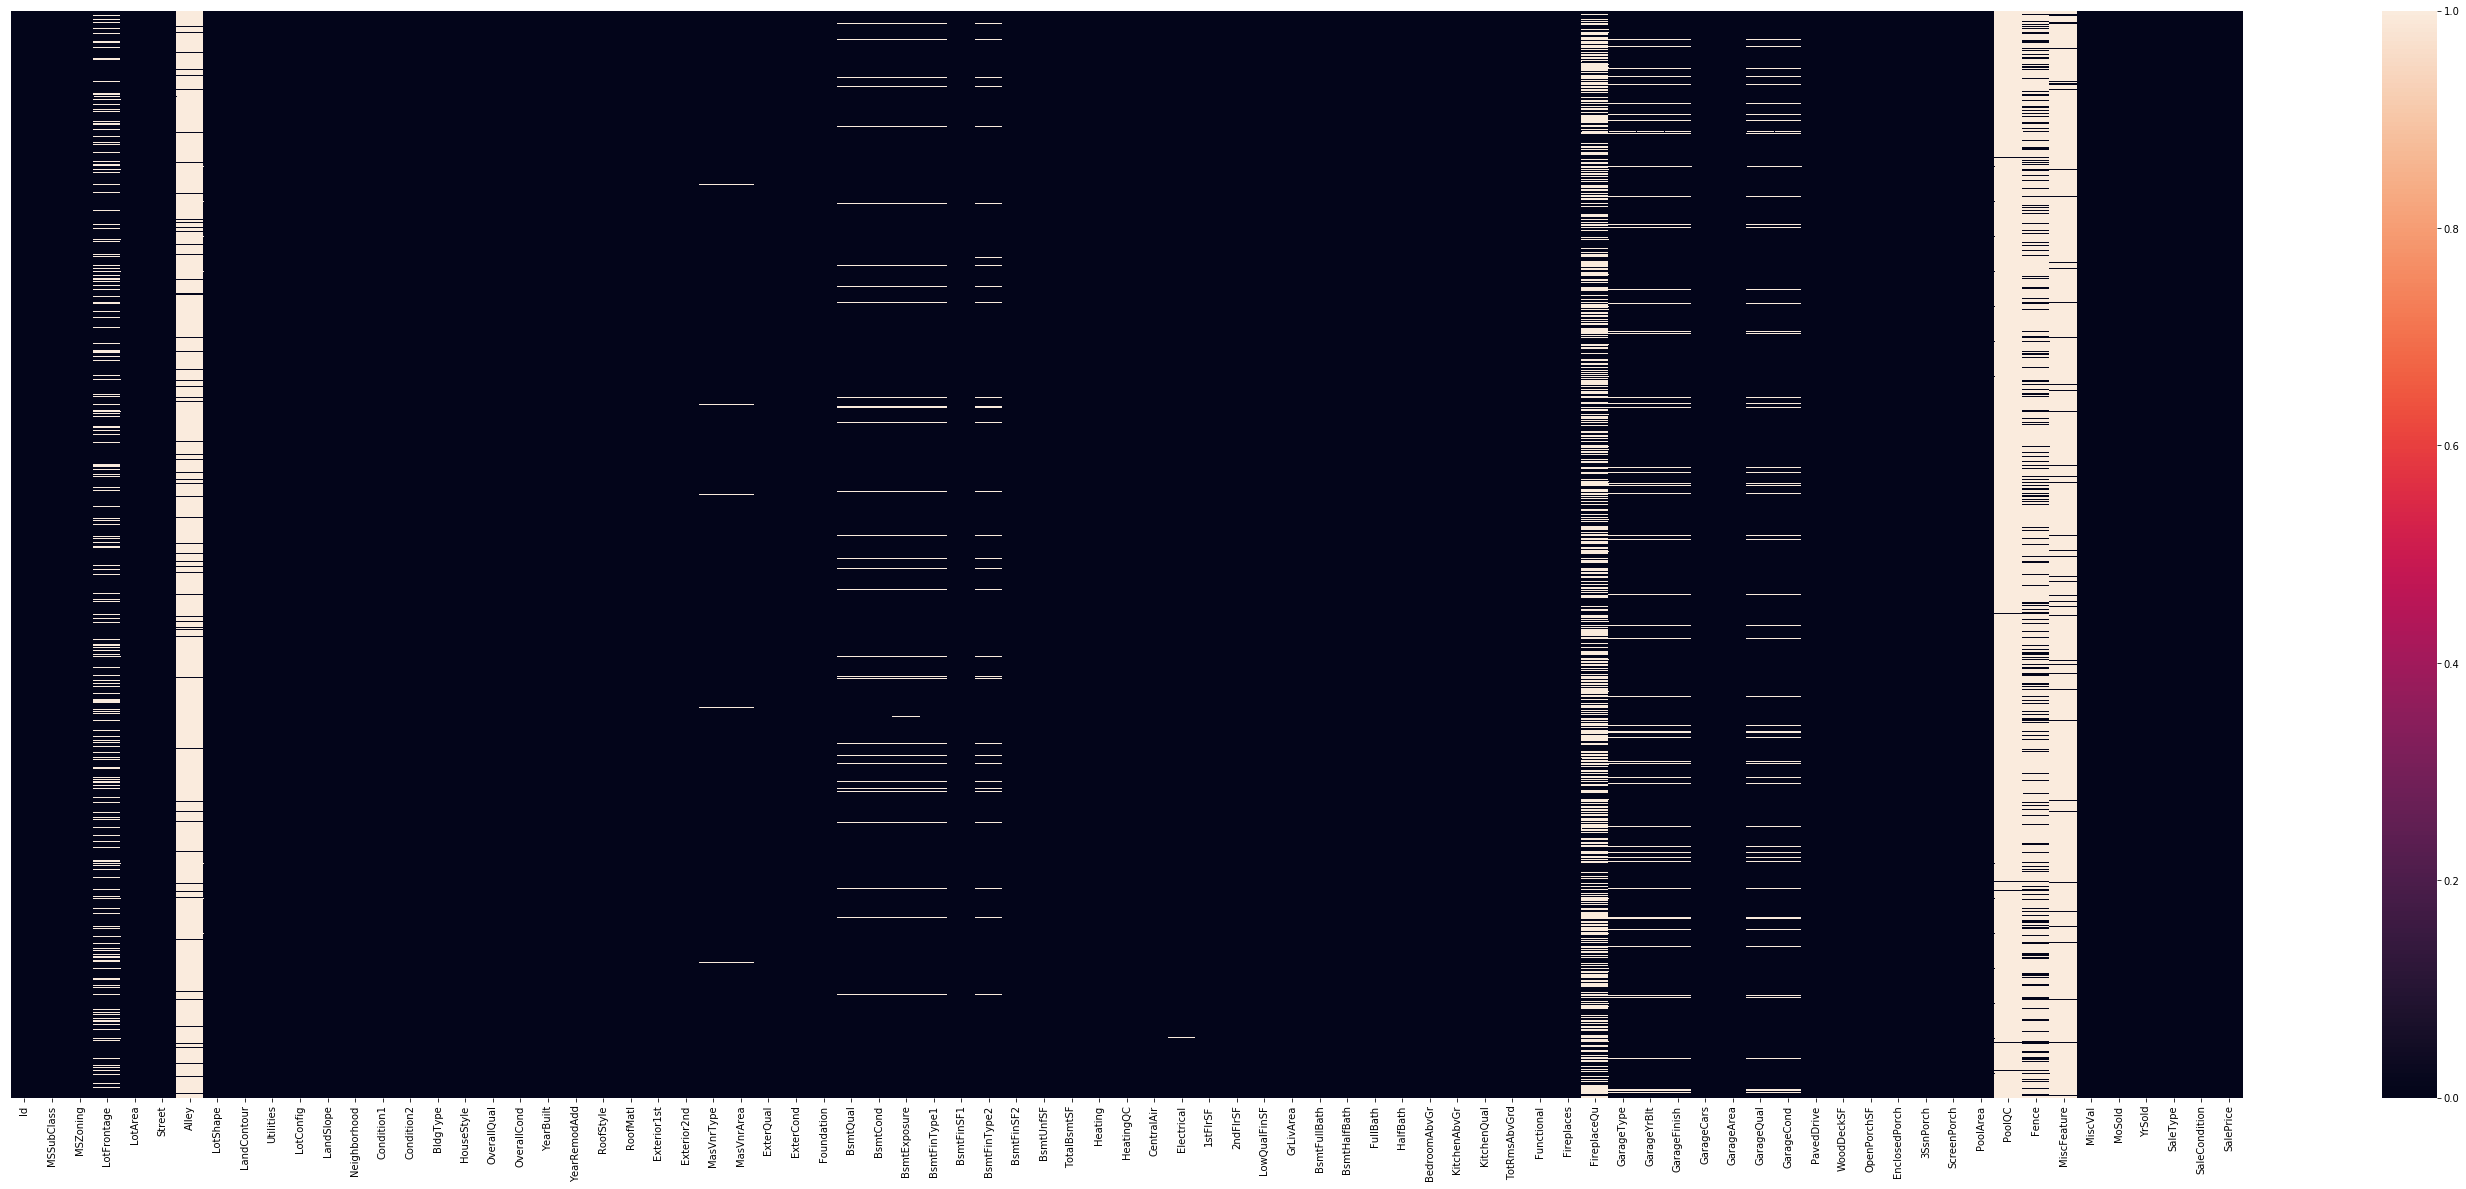

In [3]:
# Heatmap to show missing values in data
fig, ax = plt.subplots(figsize=(50,20)) 
sns.heatmap(data.isnull(), yticklabels=False, ax=ax)

In [4]:
# Dropping all columns that have missing values
df = data.dropna(axis='columns')
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
# Info of data with no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [6]:
# Showing statistics of dataset
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Columns in dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

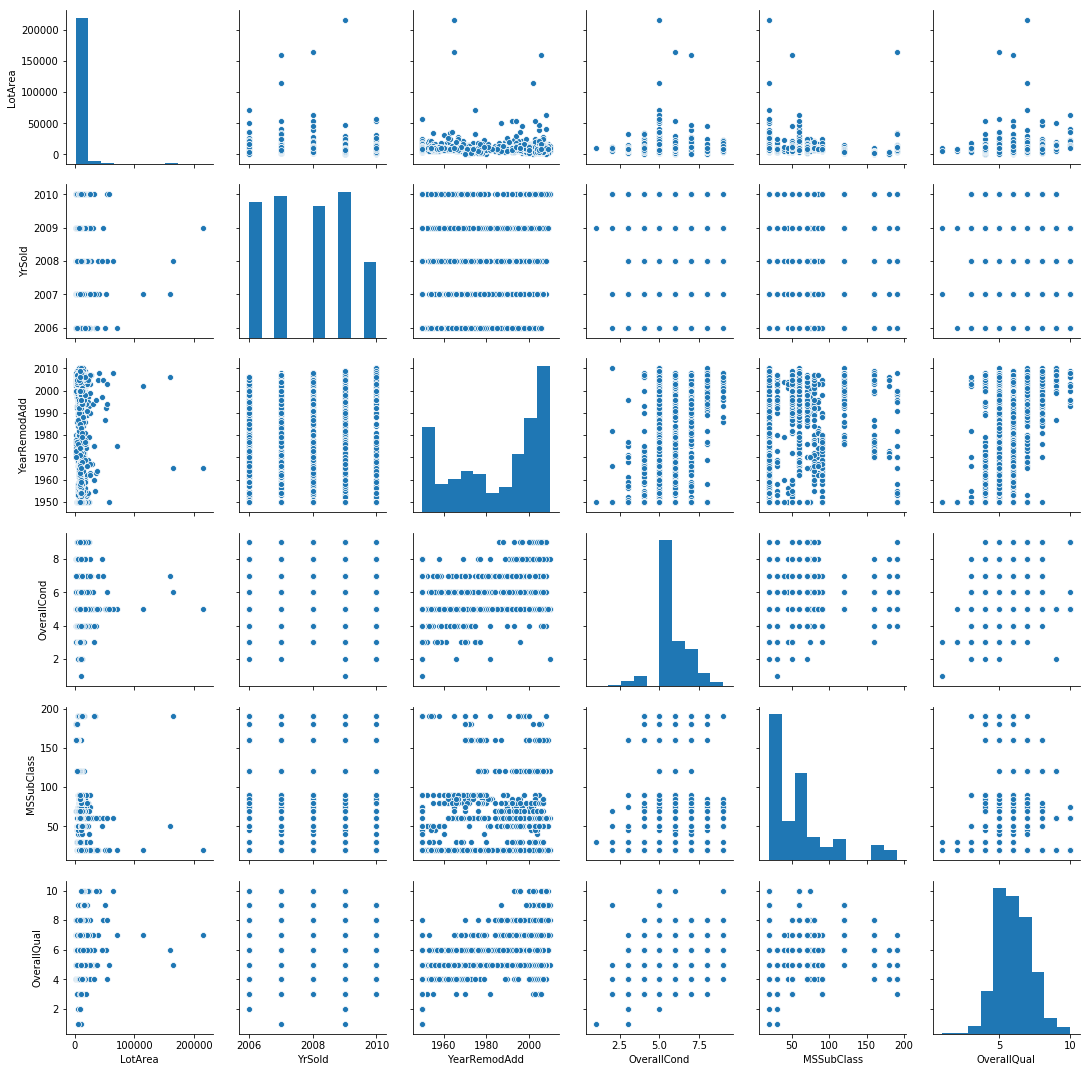

In [8]:
# Pairplot of dataset
sns.pairplot(df[['LotArea', 'YrSold','YearRemodAdd', 'OverallCond',
                 'MSSubClass', 'OverallQual']])

/Users/casey/dev/ml_projects/housing_prediction/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


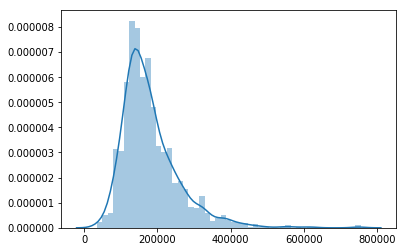

In [9]:
# Distribution of sale prices in dataset
sns.distplot(df[['SalePrice']])

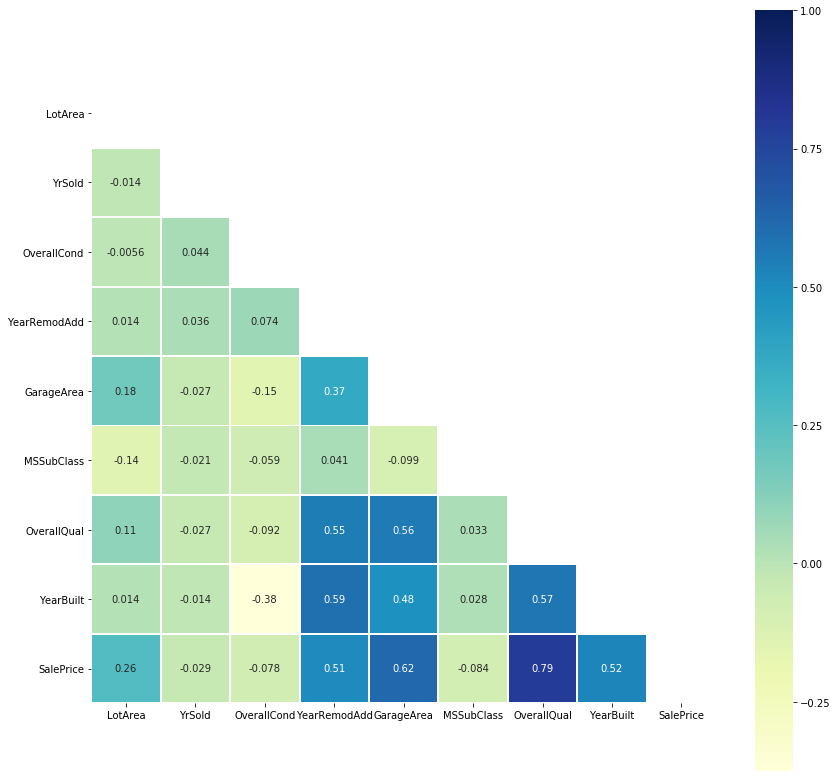

In [10]:
# Heatmap of correlation between columns in dataset
corr = np.corrcoef(np.random.randn(9, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df[['LotArea', 'YrSold', 'OverallCond', 'YearRemodAdd', 'GarageArea',
                'MSSubClass', 'OverallQual', 'YearBuilt', 'SalePrice']].corr(), 
            linewidths=1, annot=True, cmap="YlGnBu", mask=mask, square=True, ax=ax)

In [11]:
# Splitting data to predict sale price
X = df[['LotArea', 'YearRemodAdd', 'GarageArea', 'OverallQual', 'YearBuilt']]
y = df['SalePrice']

In [12]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# View training dataset
X_train.head()

,LotArea,YearRemodAdd,GarageArea,OverallQual,YearBuilt
556,14850,1957,299,5,1957
1142,9965,2007,1052,8,2006
682,2887,1997,431,6,1996
987,10159,2010,606,9,2009
1067,9760,1964,442,6,1964


In [14]:
# View testing dataset
X_test.head()

,LotArea,YearRemodAdd,GarageArea,OverallQual,YearBuilt
899,6993,1994,288,5,1961
1322,10186,1992,564,7,1992
31,8544,2006,271,5,1966
861,11625,1965,504,5,1965
1225,10482,1958,264,6,1958


In [15]:
# View training sale price data
y_train.head()

556     141000
1142    424870
682     173000
987     395192
1067    167900
Name: SalePrice, dtype: int64

In [16]:
# View testing sale price data
y_test.head()

899     135000
1322    190000
31      149350
861     131500
1225    145000
Name: SalePrice, dtype: int64

In [17]:
# Linear Regression Model from training data
lm = LinearRegression()
lm.fit(X_train,y_train)

/Users/casey/dev/ml_projects/housing_prediction/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Display coefficients of columns for model
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LotArea,1.247965
YearRemodAdd,277.307676
GarageArea,80.393474
OverallQual,34938.346014
YearBuilt,119.259401


In [19]:
# Get results from testing data
predictions = lm.predict(X_test)

Text(0.5,1,'Accuracy')

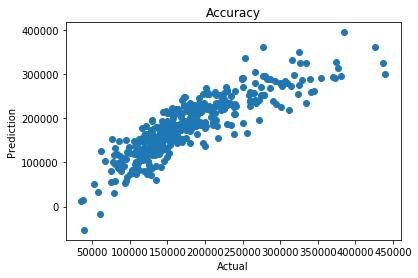

In [20]:
# Compare actual vs predicted values with a scatterplot
plt.scatter(y_test,predictions)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Accuracy')

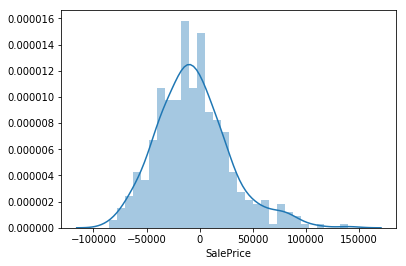

In [21]:
# Display distrubition of error in results
sns.distplot((y_test-predictions),bins=30)

In [22]:
# Print error statistics of results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 27309.09385312022
MSE: 1230881048.6375897
RMSE: 35083.91438590611


In [23]:
# Testing using model to make one prediction
lm.predict(np.array([[6000, 2011, 0, 10, 1978]]))

array([283346.8644995])

In [25]:
# Save linear model to use in web app
pickle.dump(lm, open("./static/model/lm_model.pkl","wb"))

#loading linear model from a file and making a prediction
with open("./static/model/lm_model.pkl","rb") as m:
    model = pickle.load(m)
    
model.predict(np.array([[6000, 2011, 0, 10, 1978]]))

array([283346.8644995])